In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Configurações de visualização
%matplotlib inline
sns.set(style="whitegrid")

# Carregamento dos dados
dataset = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Visualização inicial dos dados
print("Primeiros registros do dataset:")
display(dataset.head())

Primeiros registros do dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
print("Informações do dataset:")
display(dataset.info())

Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  

None

**customerID**: Identificador único para cada cliente.

**gender**: Gênero do cliente (masculino ou feminino).

**SeniorCitizen**: Indica se o cliente é um idoso (1) ou não (0).

**Partner**: Indica se o cliente tem um parceiro (Sim) ou não (Não).

**Dependents**: Indica se o cliente tem dependentes (Sim) ou não (Não).

**tenure**: Número de meses que o cliente permaneceu com a empresa.

**PhoneService**: Indica se o cliente tem um serviço telefônico (Sim) ou não (Não).

**MultipleLines**: Indica se o cliente tem múltiplas linhas telefônicas (Sim, Não, Sem serviço telefônico).

**InternetService**: Tipo de serviço de internet do cliente (DSL, Fibra óptica, Não).

**OnlineSecurity**: Indica se o cliente tem segurança online adicionada ao seu serviço de internet (Sim, Não, Sem internet).

**OnlineBackup**: Indica se o cliente tem backup online (Sim, Não, Sem internet).

**DeviceProtection**: Indica se o cliente tem proteção no dispositivo (Sim, Não, Sem internet).

**TechSupport**: Indica se o cliente tem suporte técnico (Sim, Não, Sem internet).

**StreamingTV**: Indica se o cliente tem serviço de streaming de TV (Sim, Não, Sem internet).

**StreamingMovies**: Indica se o cliente tem serviço de streaming de filmes (Sim, Não, Sem internet).

**Contract**: Tipo de contrato do cliente (Mensal, Um ano, Dois anos).

**PaperlessBilling**: Indica se o cliente optou por faturamento sem papel (Sim) ou não (Não).

**PaymentMethod**: Método de pagamento do cliente (transferência eletrônica, cartão de crédito, cheque eletrônico, cheque enviado).

**MonthlyCharges**: A quantia cobrada do cliente mensalmente.

**TotalCharges**: A quantia total cobrada do cliente.

**Churn**: Indica se o cliente deixou a empresa (Sim) ou não (Não).

# EDA

Identificar os Fatores de Churn: Compreender quais características ou comportamentos dos clientes estão mais associados ao risco de eles cancelarem seus serviços.

In [18]:
# Paleta de cores pastel
sns.set_palette('pastel')

# Print da paleta de cores
print("Paleta de cores:")
display(sns.color_palette())

Paleta de cores:


[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

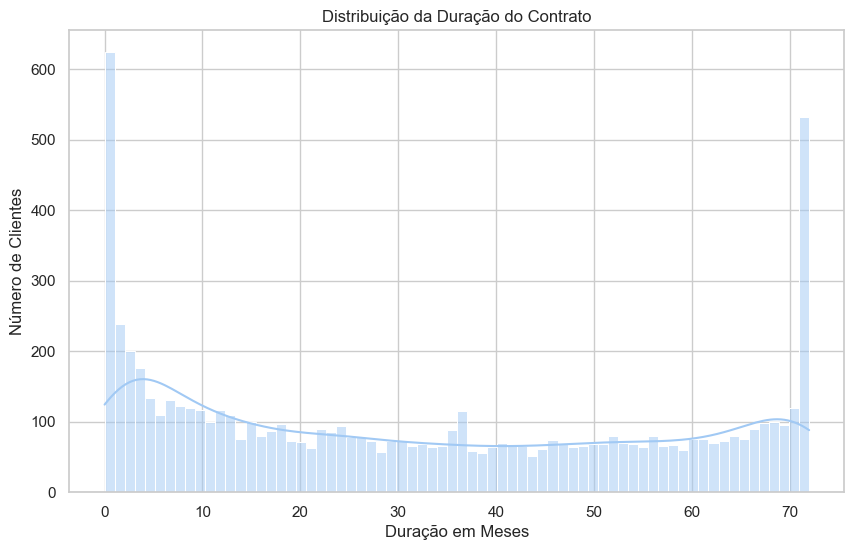

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset['tenure'], bins=70, kde=True)
plt.title('Distribuição da Duração do Contrato')
plt.xlabel('Duração em Meses')
plt.ylabel('Número de Clientes')
plt.show()

Podemos observar que muitos clientes costumar cancelar o contrato logo no primeiro mês, após o pico inicial, há uma queda acentuada no número de clientes conforme a duração do contrato aumenta. Observa-se outro pico significativo em torno dos 70 meses. Esse pico pode indicar a existência de contratos de longo prazo que chegam ao fim ou renovam-se nesse período específico, ou ainda, um número significativo de clientes fiéis que continuam com o serviço por muitos anos.

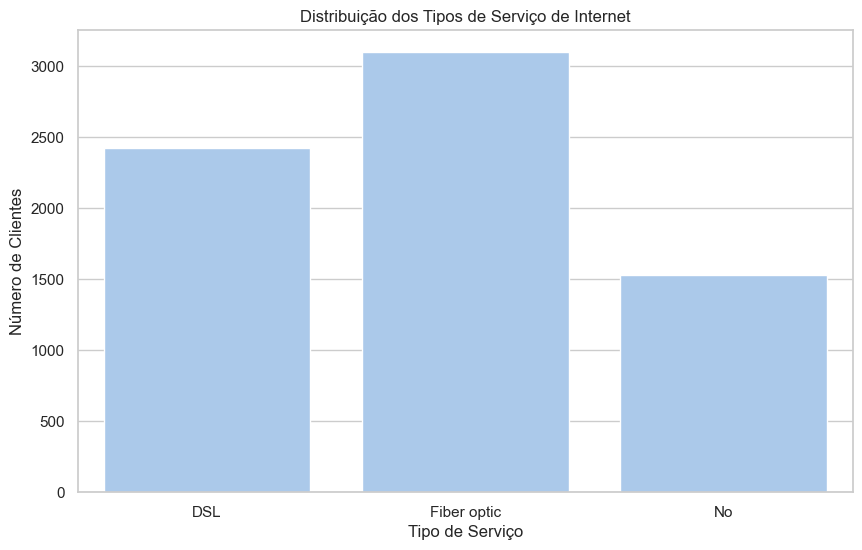

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='InternetService', data=dataset)
plt.title('Distribuição dos Tipos de Serviço de Internet')
plt.xlabel('Tipo de Serviço')
plt.ylabel('Número de Clientes')
plt.show()

O tipo de serviço de internet mais popular entre os clientes é o Fiber optic, com mais de 3000 clientes. Isso sugere que a fibra óptica é a tecnologia preferida, provavelmente devido às suas velocidades mais altas e melhor confiabilidade em comparação com o DSL.

Há um número significativo de clientes, aproximadamente 1500, que não possuem nenhum serviço de internet. Esses clientes podem estar utilizando outros serviços da empresa, como telefonia ou TV a cabo, ou podem estar localizados em áreas onde os serviços de internet da empresa não estão disponíveis.

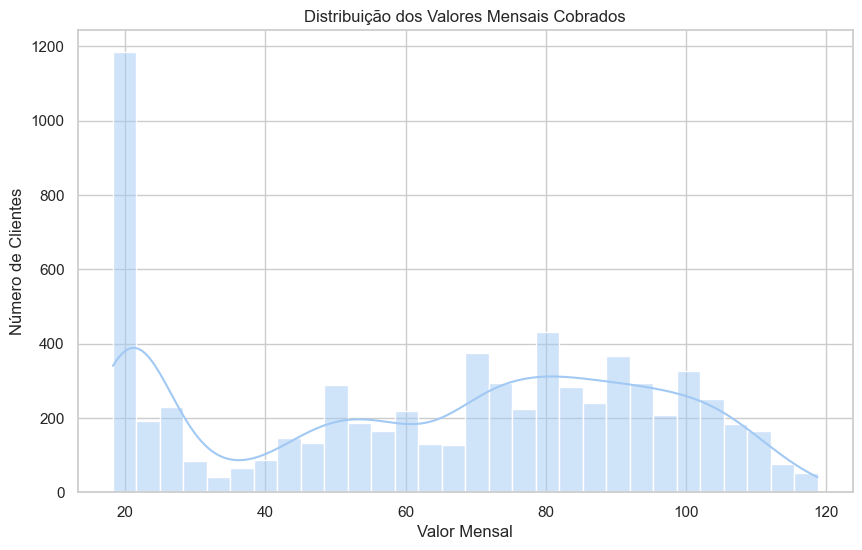

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset['MonthlyCharges'], bins=30, kde=True)
plt.title('Distribuição dos Valores Mensais Cobrados')
plt.xlabel('Valor Mensal')
plt.ylabel('Número de Clientes')
plt.show()

Há um pico muito alto na faixa de valores mensais em torno de $20. Isso indica que um grande número de clientes está pagando valores mensais baixos, o que pode indicar que eles estão utilizando apenas um serviço básico ou um pacote de serviços limitado.

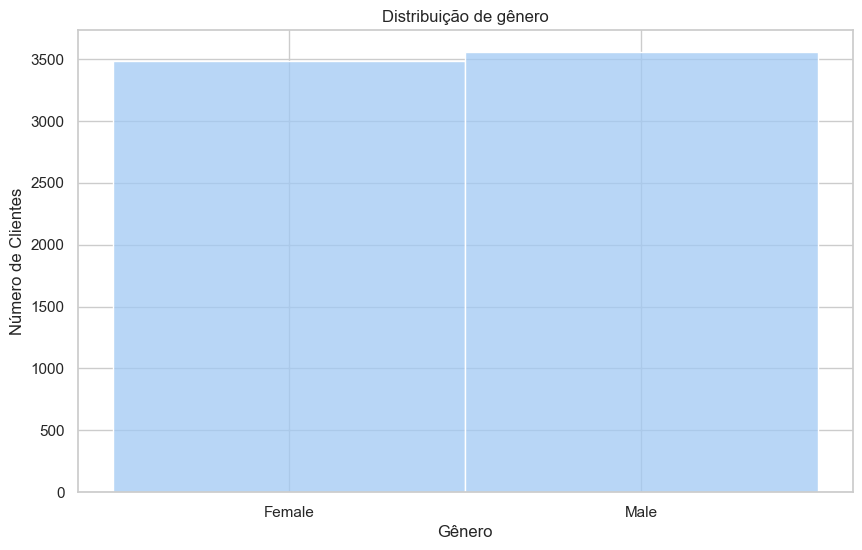

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset['gender'])
plt.title('Distribuição de gênero')
plt.xlabel('Gênero')
plt.ylabel('Número de Clientes')
plt.show()

Não existe preferência de genero entre os clientes, a quantidade de homens e mulheres é praticamente a mesma.

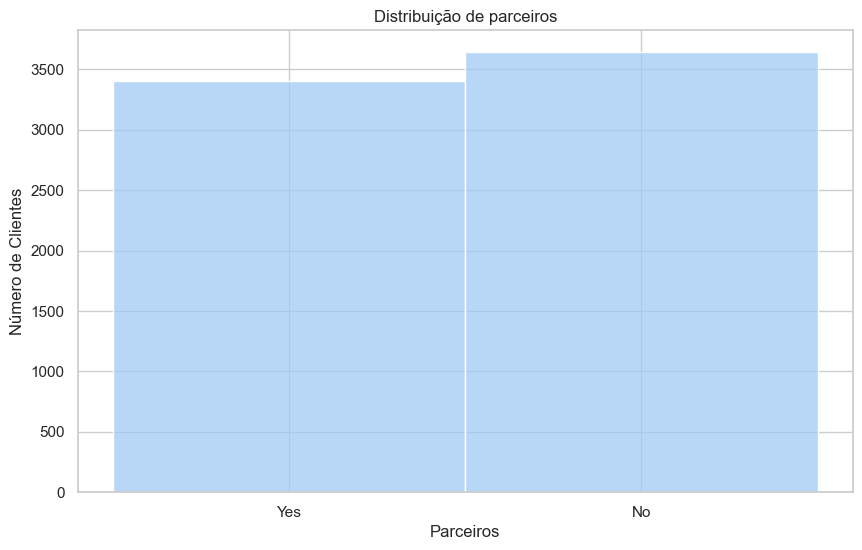

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Partner'])
plt.title('Distribuição de parceiros')
plt.xlabel('Parceiros')
plt.ylabel('Número de Clientes')
plt.show()

A empresa possui mais clientes que não possuem parceiros. O que indica pessoas solteiras ou que moram sozinhas, contratam mais o serviço. Mas não é uma diferença muito grande.

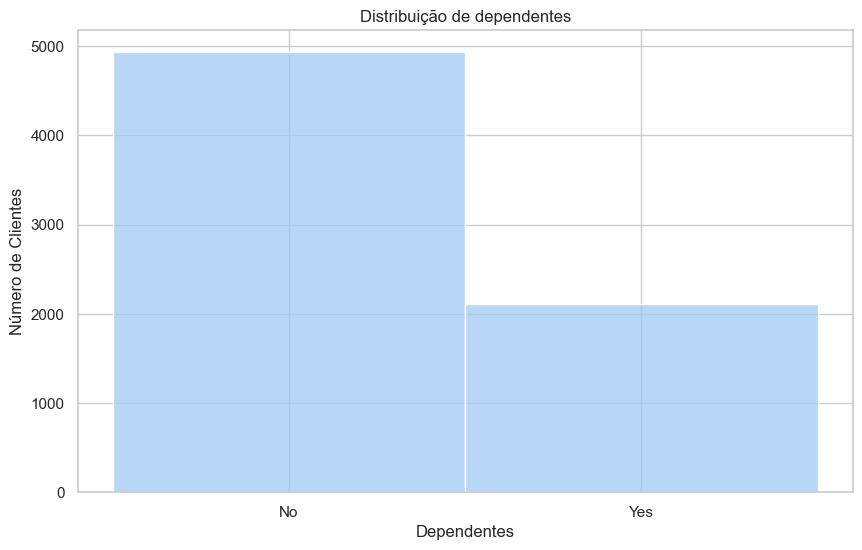

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Dependents'])
plt.title('Distribuição de dependentes')
plt.xlabel('Dependentes')
plt.ylabel('Número de Clientes')
plt.show()

A grande maioria dos clientes não possuem dependentes, o que pode indicar que a empresa tem uma base de clientes mais jovem ou que muitos clientes são solteiros ou casais sem filhos.

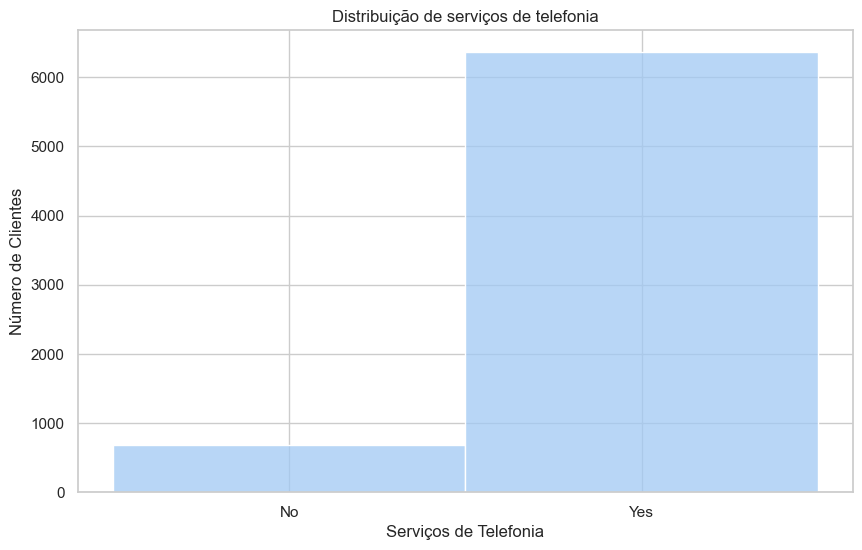

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset['PhoneService'])
plt.title('Distribuição de serviços de telefonia')
plt.xlabel('Serviços de Telefonia')
plt.ylabel('Número de Clientes')
plt.show()

A grande maioria dos clientes possui serviços de telefonia, com mais de 6000 clientes nesta categoria. Isso sugere que os serviços de telefonia são altamente populares e possivelmente uma parte essencial dos pacotes oferecidos pela empresa.

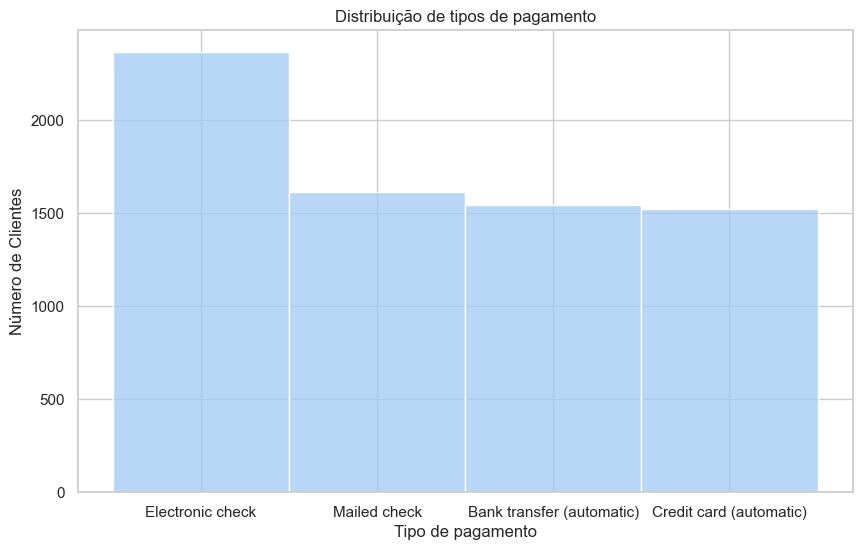

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset['PaymentMethod'])
plt.title('Distribuição de tipos de pagamento')
plt.xlabel('Tipo de pagamento')
plt.ylabel('Número de Clientes')
plt.show()